In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cluster-data/beverage_r.csv
/kaggle/input/lab-52-dataset/mobile.xlsx


In [2]:
data = pd.read_csv("/kaggle/input/cluster-data/beverage_r.csv", sep=";", index_col="numb.obs")
data.head()


,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [3]:
link = linkage(data, "ward", "euclidean")

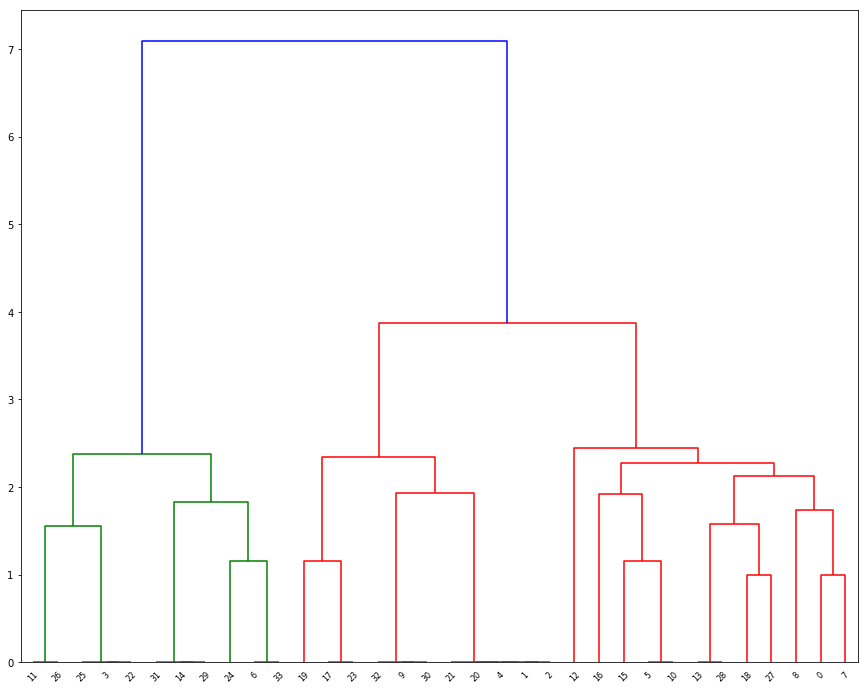

In [4]:
dn = dendrogram(link)

In [5]:
data["cluster"] = fcluster(link, 3, criterion="distance")
data.groupby("cluster").sum()
# 1 - считают диетические напитки менее вредными
# 2 - пепсикольники
# 3 - любители разнообразия, равнодушны к диетическим версиям

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0,11,6,6,0,0,10,0
2,11,3,1,0,11,0,0,3
3,9,3,1,1,5,11,1,6


# **K-means**

In [6]:
scaler = preprocessing.MinMaxScaler()

In [7]:
data = pd.read_excel("/kaggle/input/lab-52-dataset/mobile.xlsx")
data

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,56,82,121.54
1,1,221,287.51
2,36,68,113.70
3,23,96,410.23
4,29,139,537.60
...,...,...,...
4487,30,66,186.20
4488,23,112,500.68
4489,5,189,470.42
4490,69,124,858.99


In [8]:
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,0.312849,0.126382,0.023029
1,0.005587,0.345972,0.055322
2,0.201117,0.104265,0.021504
3,0.128492,0.148499,0.079199
4,0.162011,0.216430,0.103981
...,...,...,...
4487,0.167598,0.101106,0.035610
4488,0.128492,0.173776,0.096798
4489,0.027933,0.295419,0.090910
4490,0.385475,0.192733,0.166514


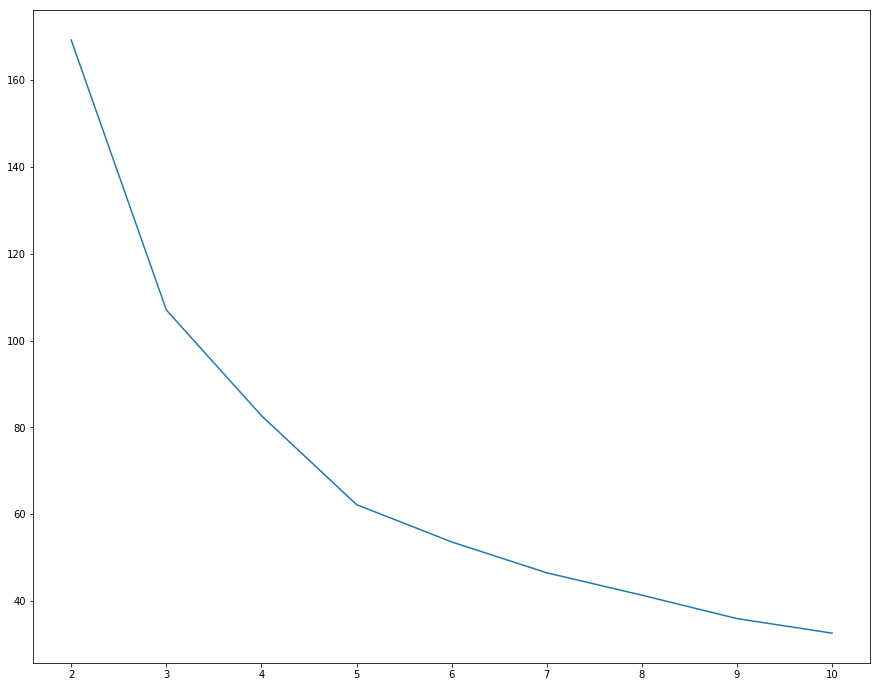

In [9]:
clusterizators = []
for x in range(2, 11):
    kmean = KMeans(n_clusters=x)
    kmean.fit(scaled_data)
    clusterizators.append(kmean)
inertias = [x.inertia_ for x in clusterizators]
plt.plot(range(2, 11), inertias)

In [10]:
clusterizator = clusterizators[3]
centroids = scaler.inverse_transform(clusterizator.cluster_centers_)
centroids
# 1 асоциальные бичи
# 2 средний пользователь, 
# 3 смсочники
# 4 любители трепаться часами, много деняк тратят на связь, презирают смски
# 5 смсочники x2

array([[   4.1405959 ,   51.31005587,  122.55758845],
       [  98.43461538,  246.36538462, 1032.75476923],
       [   8.20417755,  153.28616188,  497.56265796],
       [  45.98174832,  126.66762728,  332.83560999],
       [   8.94554455,  428.08415842, 2842.54014851]])

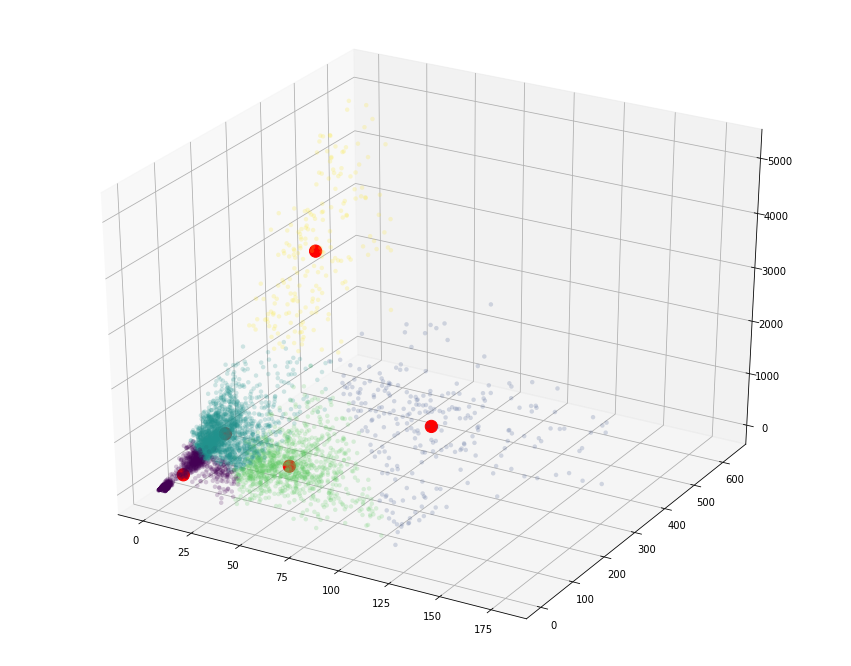

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data["Количество SMS за месяц"], data["Количество звонков"], data["Среднемесячный расход"], c=clusterizator.labels_, alpha=0.2, zorder=-1, lw=0)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c="red", s=150, alpha=1)

In [12]:
clusterizator = clusterizators[1]
centroids = scaler.inverse_transform(clusterizator.cluster_centers_)
centroids

array([[  10.18070175,  115.15292398,  345.11230117],
       [  10.02369668,  422.82938389, 2796.44407583],
       [  67.93495935,  171.89198606,  584.57234611]])

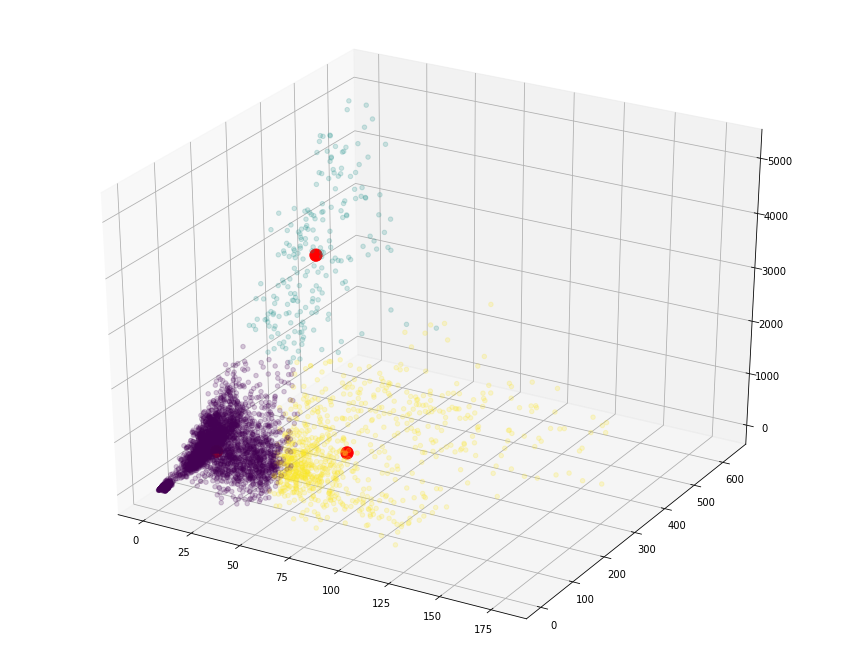

In [13]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data["Количество SMS за месяц"], data["Количество звонков"], data["Среднемесячный расход"], c=clusterizator.labels_, alpha=0.2)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c="red", s=150, alpha=1)